In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

colab_path = '/content/gdrive/MyDrive/2024_AI 보안 악성코드반/data/'
df = pd.read_csv(colab_path+'part3_iris_modified.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   137 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   target        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,NaN,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,NaN,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
df.isnull()

,sepal_length,sepal_width,petal_length,petal_width,target
0,False,False,False,False,False
1,False,True,False,False,False
2,False,False,False,False,False
3,False,True,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [6]:
df.isnull().mean()*100

sepal_length    0.000000
sepal_width     8.666667
petal_length    0.000000
petal_width     0.000000
target          0.000000
dtype: float64

In [7]:
df[df['sepal_width'].isnull()]

,sepal_length,sepal_width,petal_length,petal_width,target
1,4.9,NaN,1.4,0.2,setosa
3,4.6,NaN,1.5,0.2,setosa
17,5.1,NaN,1.4,0.3,setosa
27,5.2,NaN,1.5,0.2,setosa
37,4.9,NaN,1.4,0.1,setosa
49,5.0,NaN,1.4,0.2,setosa
61,5.9,NaN,4.2,1.5,versicolor
71,6.1,NaN,4.0,1.3,versicolor
100,6.3,NaN,6.0,2.5,virginica
118,7.7,NaN,6.9,2.3,virginica


In [8]:
# df_processed = df.dropna()
# len(df_processed)

In [9]:
replace_value = df['sepal_width'].mean().round(2)
replace_value

3.05

In [11]:
df_processed = df.fillna({'sepal_width':replace_value})
df_processed

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.50,1.4,0.2,setosa
1,4.9,3.05,1.4,0.2,setosa
2,4.7,3.20,1.3,0.2,setosa
3,4.6,3.05,1.5,0.2,setosa
4,5.0,3.60,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.00,5.2,2.3,virginica
146,6.3,2.50,5.0,1.9,virginica
147,6.5,3.00,5.2,2.0,virginica
148,6.2,3.40,5.4,2.3,virginica


In [ ]:
# 결측치를 이전/다음 값으로 대체
#ffill : forward-fill(이전값으로 대체)
#bfill : back-fill(다음값으로 대체)
# df_processed = df.fillna(method='ffill')
# df_processed

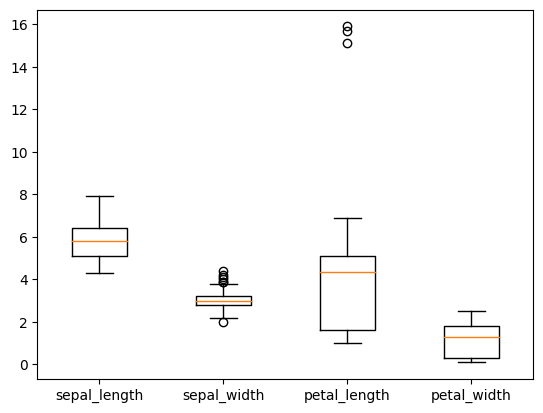

In [12]:
plt.boxplot([df_processed['sepal_length'], df_processed['sepal_width'], df_processed['petal_length'], df_processed['petal_width']])
plt.xticks([1,2,3,4], ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
plt.show()

In [13]:
# petal_length에 이상치가 분포
# 1사분위수보다 1.5 IQR보다 작거나 3사분위수보다 1.5 IQR 큰 수의 Boolean Array를 구한 후 해당하는 데이터를 구한다.
q1, q3 = np.percentile(df_processed['petal_length'], [25,75])
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
outlier_filter = (df_processed['petal_length'] < lower_bound) | (df_processed['petal_length'] > upper_bound)
df_processed[outlier_filter]

,sepal_length,sepal_width,petal_length,petal_width,target
142,5.8,2.7,15.1,1.9,virginica
143,6.8,3.2,15.9,2.3,virginica
144,6.7,3.3,15.7,2.5,virginica


In [14]:
# 이상치 제거
df_processed2 = df_processed[~outlier_filter]
df_processed2

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.50,1.4,0.2,setosa
1,4.9,3.05,1.4,0.2,setosa
2,4.7,3.20,1.3,0.2,setosa
3,4.6,3.05,1.5,0.2,setosa
4,5.0,3.60,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.00,5.2,2.3,virginica
146,6.3,2.50,5.0,1.9,virginica
147,6.5,3.00,5.2,2.0,virginica
148,6.2,3.40,5.4,2.3,virginica


In [17]:
# petal_length 데이터 정규화 (z-score)
petal_length_avg = df_processed['petal_length'].mean()
petal_length_std = df_processed['petal_length'].std()
z_score = (df_processed['petal_length'] - petal_length_avg) / petal_length_std